In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

The Uniersity of Michigan's Survey of Consumers sentiment index has been shown to be a realtively reliable indicator the direction our countries economic status is going towards. As such, it is important to understand why this is the case as it can perhaps lead to other indicators of future economic growth and status.

In this analysis, I investigate and conclude the existence of biases in these consumer sentiment indexes between participants political affiliation and the current political party in office. In order to do this I will first download historic conusmer setntiment index data and plot separately based on political affiliation. 

# 2. Data

I import a csv downloaded from the University of Michigan's Survey of Consumers [website](https://sda.umsurvey.org/sda-public/cgi-bin/hsda?harcsda+sca).

Looking at the dataframe we can immediately see that not all entries contain a political affiliation, this is either due to participants not wanting to provide this information or a loss of data. Whatever the reason is, we cannot use this data so we will need to filter it out. Moreover, upon further inspection of the POLAFF pandas series we can see that these are strings and empty entries are actually empty strings. In order to easily work with the data we will need to also turn these strings into integars

In [10]:
data = pd.read_csv('data2.csv')
data.head()

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE,POLAFF,POLREP,POLDEM,POLCRD
0,1,197801,19781,1978,1,,,76.71,116.23,51.32,,,,
1,2,197801,19781,1978,2,,,121.12,154.08,99.94,,,,
2,3,197801,19781,1978,3,,,2.70,2.70,2.70,,,,
3,4,197801,19781,1978,4,,,76.71,154.08,27.01,,,,
4,5,197801,19781,1978,5,,,121.12,116.23,124.25,,,,


In [11]:
data.tail()

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE,POLAFF,POLREP,POLDEM,POLCRD
303705,303706,202204,20222,2022,2096,1080,202110,31.60,2.00,50.62,2,,5,
303706,303707,202204,20222,2022,2097,1016,202110,120.42,77.69,147.86,2,,1,
303707,303708,202204,20222,2022,2098,1057,202110,16.80,2.00,26.31,2,,5,
303708,303709,202204,20222,2022,2099,1051,202110,76.01,77.69,74.93,1,5,,
303709,303710,202204,20222,2022,2100,1054,202110,46.41,77.69,26.31,3,,,1


Below are two functions. One takes in a dataframe and column and returns entries that don't contain a blank value in the inputted column. This works by replacing all empty strings with NAN values and returning a new df containing non-NAN values. The other takes in a dataframe and column and returns a new dataframe with all column values turned from strings to integars.  

In [14]:
def non_empty_df(df, col):
    """
    Returns dataframe containing no empty strings with a space ' '
    """
    
    col_no_nulls = df[col].replace(' ', np.nan)
    non_empty_df = df[col_no_nulls.notnull()]
    
    return non_empty_df

def df_string_to_int(df, col):
    """
    Returns dataframe containing strings of numbers into integars
    """
    no_string_df = df.copy()
    no_string_df['POLAFF'] = pd.to_numeric(df[col]) 

    return no_string_df

In [16]:
nonempty_data = non_empty_df(data, 'POLAFF')
clean = df_string_to_int(nonempty_data, 'POLAFF')
clean.head()

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE,POLAFF,POLREP,POLDEM,POLCRD
28063,28064,198006,19802,1980,1,,,2.70,2.70,2.70,2,,1,
28064,28065,198006,19802,1980,2,,,91.51,78.39,99.94,3,,,5
28065,28066,198006,19802,1980,3,,,121.12,78.39,148.56,8,,,
28066,28067,198006,19802,1980,4,,,47.11,78.39,27.01,2,,1,
28067,28068,198006,19802,1980,5,,,17.50,40.54,2.70,3,,,5


In [18]:
clean.tail()

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE,POLAFF,POLREP,POLDEM,POLCRD
303705,303706,202204,20222,2022,2096,1080,202110,31.60,2.00,50.62,2,,5,
303706,303707,202204,20222,2022,2097,1016,202110,120.42,77.69,147.86,2,,1,
303707,303708,202204,20222,2022,2098,1057,202110,16.80,2.00,26.31,2,,5,
303708,303709,202204,20222,2022,2099,1051,202110,76.01,77.69,74.93,1,5,,
303709,303710,202204,20222,2022,2100,1054,202110,46.41,77.69,26.31,3,,,1


# 3. Investigation
Now that we have filtered we have gone from 45 years of data to 17. A little more than half of the data is usable for a democratic vs republican bias investigation. As such, it will be worth looking into the relationship between answers from republicans and democrats vs those that didn't input their poltical affiliation

In [228]:
len(data['YYYY'].unique()), len(clean['YYYY'].unique())

(45, 17)

In order to make inferences of bias based on the current political party active in office, I will use a dataset from [The Guardian](https://www.theguardian.com/news/datablog/2012/oct/15/us-presidents-listed#data) containing all US Presidents and their political party. However this dataset is incomplete and ends before the end of the Obama Administration. So, I will manually add the last few data points with my own dataframe. Then I will clean and filter the dataframe to leave only the necessary information.

In [229]:
presidents_incomplete = pd.read_csv('us_presidents.csv')
presidents_incomplete.tail()

,Years (after inauguration),President,Party
222,2009,Barack Obama,Democrat
223,2010,Barack Obama,Democrat
224,2011,Barack Obama,Democrat
225,2012,Barack Obama,Democrat
226,2013,Barack Obama,Democrat


In [230]:
years = np.arange(2014, 2023)
pres = np.zeros(9)
party = ['Democrat'] * 3 + ['Republican'] * 4 + ['Democrat'] * 2
temp_df = pd.DataFrame(zip(years, pres, party), columns=['Years (after inauguration)', 'President', 'Party'])

presidents = presidents_incomplete.append(temp_df, ignore_index = True)
presidents = presidents.drop(['President'], axis=1)
presidents = presidents.set_axis(['Year', 'Party'], axis=1, inplace=False)
presidents = presidents.loc[presidents['Year'] > 1979]

presidents.head()

,Year,Party
193,1980,Democrat
194,1981,Republican
195,1982,Republican
196,1983,Republican
197,1984,Republican


Now, we can plot the consumer sentiment scores for democratic and republican participants during democratic and republican presidencies. Before I do this though, I create a function to create groupbys for dataframes to get the average ICS for each year of specific political affiliations.

Looking at the graph we can see that in democratic years, democratic particpants had higher sentiment scores and during republican years, republican participants had higher sentiment scores indicating a bias towards the current political power.

In [232]:
def create_grp_by(df, col, val):
    """
    Creates group by of years for specific value in inputted column in inputted dataframe 
    and aggregate based on mean
    """
    
    new_df = df.loc[df[col] == val].groupby('YYYY').mean()
    return new_df

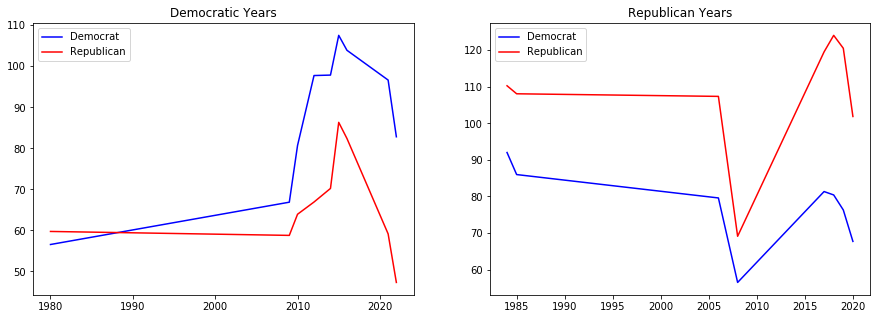

In [280]:
democrat_years = presidents.loc[presidents['Party'] == 'Democrat']['Year']
republican_years = presidents.loc[presidents['Party'] == 'Republican']['Year']

grp_by_democrat = create_grp_by(clean, 'POLAFF', 2)['ICS'] ## A value of 2 is democrat and 1 is republican
grp_by_republican = create_grp_by(clean, 'POLAFF', 1)['ICS'] ## according to the survey's documentation

demo_demo = grp_by_democrat.loc[[i for i in democrat_years if i in grp_by_democrat.index]]
demo_repub = grp_by_republican.loc[[i for i in democrat_years if i in grp_by_republican.index]]
repub_demo = grp_by_democrat.loc[[i for i in republican_years if i in grp_by_democrat.index]]
repub_repub = grp_by_republican.loc[[i for i in republican_years if i in grp_by_republican.index]]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(demo_demo, label='Democrat', color='b')
ax[0].plot(demo_repub, label='Republican', color='r')

ax[1].plot(repub_demo, label='Democrat', color='b')
ax[1].plot(repub_repub, label='Republican', color='r')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

ax[0].set_title('Democratic Years')
ax[1].set_title('Republican Years')

plt.show()

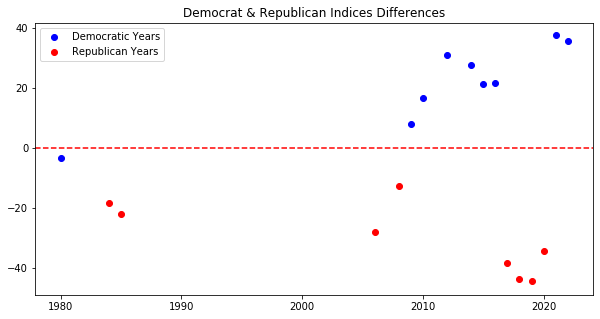

In [281]:
plt.figure(figsize=(10, 5))
plt.scatter(demo_demo.index, demo_demo - demo_repub, label='Democratic Years', color='b')
plt.scatter(repub_demo.index, repub_demo - repub_repub, label='Republican Years', color='r')

plt.axhline(y=0, color='red', linestyle='--')

plt.legend(loc='upper left')
plt.title('Democrat & Republican Indices Differences')
plt.show()

Above is another visualization showing more clearly the differences between republican & democratic sentiment scores. A positive point means that the democratic participants sentiment scores were higher than the republicans and a negative point means that the republican participants sentiment scores were higher than the democrats. 

Now that we have confirmed that democrats are biased towards sentiment scores higher than republicans if a democrat president is elected and vice versa, let's use the data from the participants who didn't submit a political affiliation and use this as sentiment score from the general public to see if democrats are more likely to have higher sentiment scores than the average person if a democratic president is in power and vice versa for a republican.

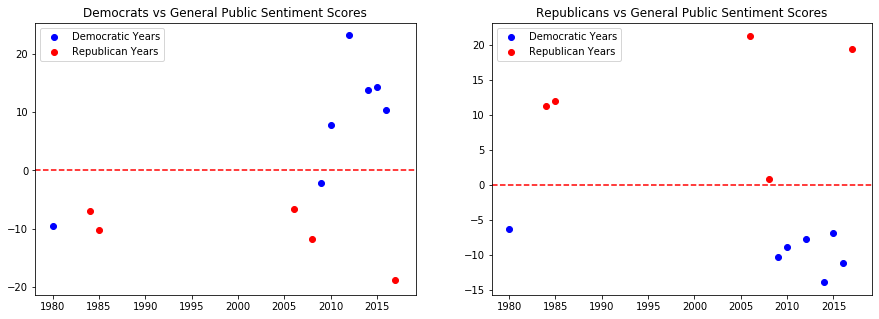

In [282]:
general_public = create_grp_by(data, 'POLAFF', ' ')['ICS']

democrat_index = [i for i in democrat_years if i in demo_demo.index and i in general_public.index]
republican_index = [i for i in republican_years if i in repub_repub.index and i in general_public.index]

demo_general_public = general_public.loc[democrat_index]
repub_general_public = general_public.loc[republican_index]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(demo_demo.index, demo_demo - demo_general_public, label='Democratic Years', color='b')
ax[0].scatter(repub_demo.index, repub_demo - repub_general_public, label='Republican Years', color='red')

ax[1].scatter(demo_repub.index, demo_repub - demo_general_public, label='Democratic Years', color='b')
ax[1].scatter(repub_repub.index, repub_repub - repub_general_public, label='Republican Years', color='red')

ax[0].axhline(y=0, color='red', linestyle='--')
ax[1].axhline(y=0, color='red', linestyle='--')

ax[0].set_title('Democrats vs General Public Sentiment Scores')
ax[1].set_title('Republicans vs General Public Sentiment Scores')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()

Here we see the same result, democrats and republicans are biased towards higher sentiment scores if their party is in office and lower if the opposing party is in office.  

# 4. Conclusion

From the above graphs we can see that for almost every year, democrats and republicans both had higher sentiment scores if their party was in office and vice versa. However, as it was noted earlier, during filtering and cleaning we lost over 50% of the years available to us and as such this analysis only really pertains to the 21st century.

# 5. Bibliography

- https://sda.umsurvey.org/sda-public/cgi-bin/hsda?harcsda+sca
- https://www.theguardian.com/news/datablog/2012/oct/15/us-presidents-listed#data